## Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data of Breast Cancer

In [6]:
df=pd.read_csv("data (1).csv")



In [30]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Preproccing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Replacing the output from letters to numbers to enter it to the model

In [8]:
df.diagnosis.replace("M",1,inplace=True)
df.diagnosis.replace("B",0,inplace=True)

df.diagnosis.dtype

dtype('int64')

In [9]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Text(0, 0.5, 'Begign or malignant')

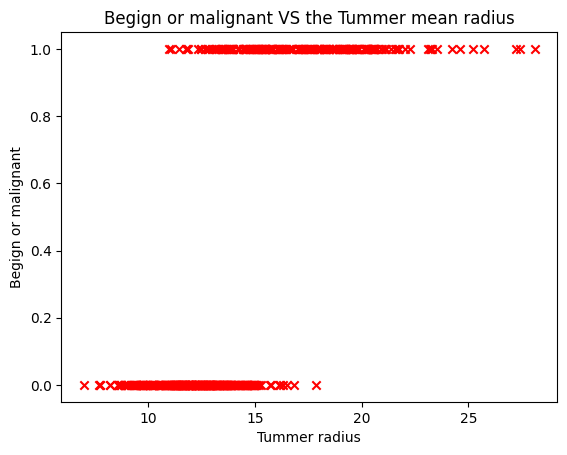

In [10]:
plt.scatter(x=df["radius_mean"],y=df["diagnosis"],marker="x",c='r')

plt.title("Begign or malignant VS the Tummer mean radius")
plt.xlabel("Tummer radius")
plt.ylabel("Begign or malignant")

# Machine Learning Model for Classification

In [38]:
def linear_Model(X_train,W,b=0):
#     f=np.zeros(X_train.shape[0])
#     for j in range(X_train.shape[1]):
        
#         f+=X_train[:,j]*W[j]
#     f+=b
#     return f
    return np.dot(X_train,W)+b

In [39]:
def Sigimod_func(X_train,W,b):
    return 1/(1+np.exp(-linear_Model(X_train,W,b)))

## feature Scaling by dividing maximum number

In [59]:
def Feature_Scaling_Max(X):
    for i in range(X.shape[1]):
        X.iloc[:,i]/=X.iloc[:,i].max()
    return X

## Spliting data into Train and test set 

In [143]:
X=df[["radius_mean","texture_mean","smoothness_mean"]]

X=Feature_Scaling(X)

Y=df.diagnosis
X_train=X.iloc[:int(0.7*len(X)),:]
Y_train=df.diagnosis[:int(0.7*len(X))]
X_test=X.iloc[int(0.7*len(X)):,:].reset_index().iloc[:,1:]
Y_test=df.diagnosis[int(0.7*len(X)):].reset_index().diagnosis
# X_train=np.arange(-10,10)
# Y_train=np.array([0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,1,0])


### inzilaize random paramters

In [144]:
W=np.array([0.007,0.003,0.001])
b=0

## Ploting X with Y with probability function of output in one on it's projection

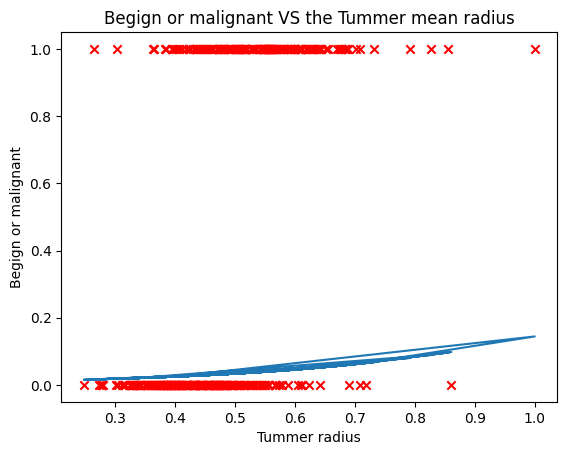

In [171]:

def plot_prob_func(X,Y,W,b,order_feature):
    plt.plot(X.iloc[:,order_feature-1],Sigimod_func(X.iloc[:,order_feature-1],W[order_feature],b))
    plt.scatter(X.iloc[:,order_feature-1],Y,marker="x",c='r')
    plt.title("Begign or malignant VS the Tummer mean radius")
    plt.xlabel("Tummer radius")
    plt.ylabel("Begign or malignant")
plot_prob_func(X_train,Y_train,W,b,2)

In [ ]:
Y_train

In [146]:
def Compute_Cost(X_train,Y_train,W,b):
    m=X_train.shape[0]
#     Error=0
#     for i in range(m):
#         Error-=Y_train[i]*np.log(Sigimod_func(X_train,W,b)[i])+(1-Y_train[i])*np.log(1-Sigimod_func(X_train,W,b)[i])
#     return Error/(m)
        
    return (-1/(m))*np.sum(Y_train*np.log(Sigimod_func(X_train,W,b))+(1-Y_train)*np.log(1-Sigimod_func(X_train,W,b)))

In [147]:
Compute_Cost(X_train,Y_train,W,b)

0.6931041852244716

In [148]:
def gradient(X_train,Y_train,W,b):
    m=X_train.shape[0]
#     dj_dw,dj_db=0,0

#     for i in range(m):
#         dj_dw+=(Y_train[i]-Sigimod_func(X_train[i],W,b))*X_train[i]*(-1)
#         dj_db+=(Y_train[i]-Sigimod_func(X_train[i],W,b))*(-1)
#     return dj_dw/m,dj_db/m
    dj_db=(1/m)*np.sum((Y_train-Sigimod_func(X_train,W,b))*(-1))
    dj_dw=(1/m)*np.sum(np.dot(Sigimod_func(X_train,W,b)-Y_train,X_train))
    return dj_dw,dj_db

## Graph the Cost function with W to try get the best w can i start with

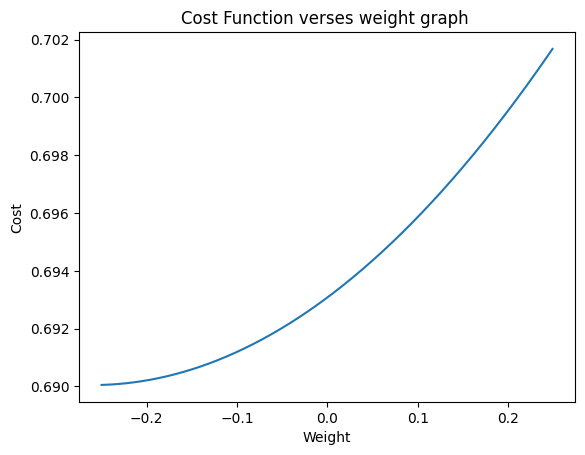

In [149]:
def plot_Cost_W(X_train,Y_train,b,W,order_feature=1,W_list=np.arange(-250,250)/1000):

    cost_list=[]
    for i in range(len(W_list)):
        W[order_feature-1]=W_list[i]
        cost_list.append(Compute_Cost(X_train,Y_train,W,b))
    plt.plot(W_list,cost_list)
    plt.title("Cost Function verses weight graph ")
    plt.xlabel("Weight")
    plt.ylabel("Cost")
    plt.show()
    

plot_Cost_W(X_train,Y_train,b,W,3)

## The Same with b

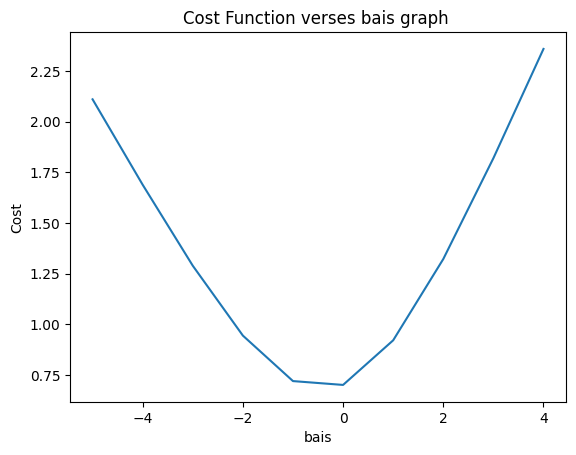

In [150]:
def plot_Cost_B(X_train,Y_train,W,B_list=np.arange(-20,30)):

    cost_list=[]
    for i in range(len(B_list)):
        cost_list.append(Compute_Cost(X_train,Y_train,W,B_list[i]))
    plt.plot(B_list,cost_list)
    plt.title("Cost Function verses bais graph ")
    plt.xlabel("bais")
    plt.ylabel("Cost")
    plt.show()
plot_Cost_B(X_train,Y_train,W,B_list=np.arange(-5,5))

## Predictive function to predict is tumer Begign or malignant

In [151]:
def Predictive_func(X,W,b):
    Predictions=np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        if (Sigimod_func(X,W,b)[i] >=0.5):
            Predictions[i]=1
        
    
#     Predictions[Sigimod_func(X,W,b) >=0.5]=1
    return  Predictions

In [152]:
def Confusion_matrix(Y,Predictions):
    Positive_True=0
    negative_True=0
    Positive_False=0
    negative_False=0
    for i in range(len(Y)):
        if Y[i]==1 and Predictions[i]==1:
            Positive_True+=1
        elif Y[i]==1 and Predictions[i]==0:
            negative_True+=1
        elif Y[i]==0 and Predictions[i]==1:
            Positive_False+=1
        else:
            negative_False+=1
#     Recall=Positive_True/(negative_False+Positive_True)
#     Precision=Positive_True/(Positive_True+Positive_False)
#     F1_Score=2*(Precision*Recall)/(Recall+Precision)
    Accuracy=(Positive_True+negative_False)*100/(Positive_True+negative_True+Positive_False+negative_False)
    return Accuracy

In [153]:
def train_accuracy(Y_train,X_train,W,b):
    return Confusion_matrix(Y_train,Predictive_func(X_train,W,b))

In [154]:
def test_accuracy(Y_test,X_test,W,b):
    return Confusion_matrix(Y_test,Predictive_func(X_test,W,b))

In [160]:

def gradient_desent(X_train,Y_train,W,b,Alpha=0.1,iterations=1000):
    cost_list=[Compute_Cost(X_train,Y_train,W,b)]
    W_list=[W]
    j=0
    for i in range(iterations):
        
        dj_dw,dj_db=gradient(X_train,Y_train,W,b)
        
        W-=Alpha*dj_dw
        b-=Alpha*dj_db
        cost_list.append(Compute_Cost(X_train,Y_train,W,b))
        W_list.append(W)
        
        if (i%(iterations/10)==0 or i==iterations-1):
            j+=1
            print("The Cost funtion will equal ",Compute_Cost(X_train,Y_train,W,b))
            print("the W  have reached equal ",W)
            
            if (cost_list[j]<cost_list[j-1]):
                print("the cost function is decrease")
            else:
                print("the cost function is increase ya 5ayb")
            
            print("The Accuracy of the model reach to ",train_accuracy(Y_train,X_train,W,b))
    
    
    
    plt.plot(np.arange(iterations),cost_list[:iterations])
    return W,b

The Cost funtion will equal  0.5224739178469985
the W  have reached equal  [2.15737916 2.15337916 2.39937916]
the cost function is decrease
The Accuracy of the model reach to  76.88442211055276
The Cost funtion will equal  0.5105883409273845
the W  have reached equal  [2.33760342 2.33360342 2.57960342]
the cost function is decrease
The Accuracy of the model reach to  89.19597989949749
The Cost funtion will equal  0.5065585388358756
the W  have reached equal  [2.40844703 2.40444703 2.65044703]
the cost function is decrease
The Accuracy of the model reach to  89.44723618090453
The Cost funtion will equal  0.5026318092759314
the W  have reached equal  [2.47476363 2.47076363 2.71676363]
the cost function is decrease
The Accuracy of the model reach to  89.69849246231156
The Cost funtion will equal  0.4987959075922357
the W  have reached equal  [2.54018512 2.53618512 2.78218512]
the cost function is decrease
The Accuracy of the model reach to  89.94974874371859
The Cost funtion will equal  0

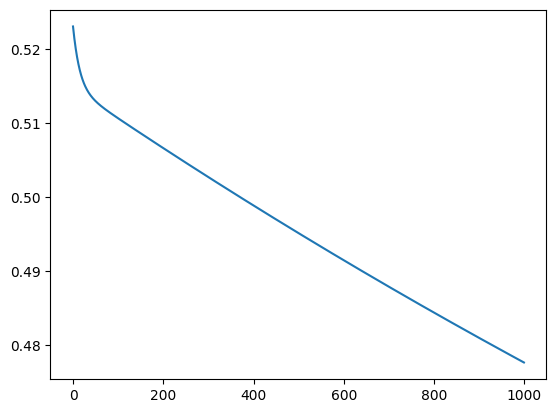

In [164]:
W,b=gradient_desent(X_train,Y_train,W,b,Alpha=0.04,iterations=1000)


In [165]:
f"test accuracy reach to {test_accuracy(Y_test,X_test,W,b)}"

'test accuracy reach to 88.88888888888889'